# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

import sys
import pandas as pd

if '..' not in sys.path:
    sys.path.insert(0, '..')

In [3]:
from src.m_utils import constants as cts
from src.base.data_loaders.data_loader import DLName
from src.base.gt_loaders.gt_names import GTName
from src.exp_runner import ExperimentRunner

from src.base.experiment.dataset.dataset import Dataset
from src.base.experiment.evaluation.model_evaluator import DataSource, DataPredSelection
from src.base.experiment.training.base_models import BaseModel
from src.base.experiment.training.optimizers import Optimizer

from src.m_utils.mtl_approach import MTLApproach
from src.m_utils.nas_mtl_approach import NAS_MTLApproach

 ==> Restrict GPU memory growth: True


# Start Network runner

In [4]:
#DATASET = Dataset.MNIST


kwargs = { 
    'use_neptune': True,
    'exp_params' : {
        'name': 'neural_arch_search',
        #'description': f'{NAS_APPROACH.value} with {DATASET.value["name"].upper()} dataset with {N_TRIALS} trials and patience and {N_CHILD_EPOCHS} child epoch',
        #'tags': ['nas', f'{NAS_APPROACH_STR}', 'benchmark', f'{DATASET.value["name"]}', f'{N_CHILD_EPOCHS_STR}'],
        'description': 'test',
        'tags': ['test'],
        'src_files': ["../src/**/*.py"]
    },
    'properties': {
        'approach': NAS_MTLApproach.APPROACH_3,
        'benchmarking': {
            'use_benchmark_data': True,
            'dataset': Dataset.MNIST
        },
        'icao_data': {
            'icao_gt': {
                'use_gt_data': False,
                'gt_names': {
                    'train_validation': [],
                    'test': [],
                    'train_validation_test': [GTName.FVC]
                },
            },
            'icao_dl': {
                'use_dl_data': False,
                'tagger_model': None
            },
            'reqs': Dataset.FVC_ICAO.value['tasks'],
            'aligned': False
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': True,
        'exec_nas': True,
        'orig_model_experiment_id': '',
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'nas_params': {
        #'max_blocks_per_branch': 5,
        #'n_child_epochs': N_CHILD_EPOCHS,
        #'controller_epochs': CONTROLLER_EPOCHS,
        #'controller_batch_size': 64,
        #'n_trials': N_TRIALS,

        'controller_sampling_epochs': 2,
        'samples_per_controller_epochs': 3,
        'controller_training_epochs': 5,
        'architecture_training_epochs': 2,
        'controller_loss_alpha': 0.9
    },
    'controller_params': {
        'controller_lstm_dim': 100,
        'controller_optimizer': 'Adam',
        'controller_learning_rate': 0.01,
        'controller_decay': 0.1,
        'controller_momentum': 0.0,
        'controller_use_predictor': False
    },
    'mlp_params': {
        'max_architecture_length': 5,
        'min_task_group_size': 3,
        'mlp_base_model': BaseModel.MOBILENET_V2,
        'mlp_n_epochs': 3,
        'mlp_batch_size': 64,
        'mlp_early_stopping': 5,
        'mlp_optimizer': Optimizer.ADAM,
        'mlp_learning_rate': 1e-2,
        'mlp_decay': 0.0,
        'mlp_momentum': 0.0,
        'mlp_dropout': 0.2,
        'mlp_loss_function': 'categorical_crossentropy',
        'mlp_one_shot': False
    }
}


runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 101599
Process ID: 106737
---------------------------
-----
Use Neptune:  True
-----
-------------------
Args: 
{'controller_params': {'controller_decay': 0.1,
                       'controller_learning_rate': 0.01,
                       'controller_lstm_dim': 100,
                       'controller_momentum': 0.0,
                       'controller_optimizer': 'Adam',
                       'controller_use_predictor': False},
 'exp_params': {'description': 'test',
                'name': 'neural_arch_search',
                'src_files': ['../src/**/*.py'],
                'tags': ['test']},
 'mlp_params': {'max_architecture_length': 5,
                'min_task_group_size': 3,
                'mlp_base_model': <BaseModel.MOBILENET_V2: {'name': 'mobilnet_v2', 'target_size': (224, 224), 'prep_function': <function preprocess_input at 0x7f2a59146550>}>,
                'mlp_bat

# Load Data

In [5]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
TrainData.shape: (48000, 11)
ValidationData.shape: (12000, 11)
TestData.shape: (10000, 11)
Data loaded


In [6]:
runner.train_data.head()

,img_name,n_0,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,n_9
0,/home/guilherme/data1/Dropbox/Link to Desktop/...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,/home/guilherme/data1/Dropbox/Link to Desktop/...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/home/guilherme/data1/Dropbox/Link to Desktop/...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/home/guilherme/data1/Dropbox/Link to Desktop/...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,/home/guilherme/data1/Dropbox/Link to Desktop/...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# <font color='red'>Producing Fake Data</font>

In [7]:
runner.produce_fake_data()

-------------------- producing fake data for experimental purposes -------------------
fake_train_data.shape: (500, 11)
fake_validation_data_df.shape: (100, 11)
fake_test_data_df.shape: (50, 11)


# Data Generators

In [8]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 500 validated image filenames.
Found 100 validated image filenames.
Found 50 validated image filenames.
TOTAL: 650

Logging class indices
 .. MTL model not logging class indices!

Using benchmarking dataset. Not logging class labels!


# Setup Experiment

In [9]:
runner.setup_experiment()

-------------------- create experiment -------------------
Setting up neptune experiment
Neptune experiment setup done!


# Labels Distribution

In [10]:
%%capture
runner.summary_labels_dist()

# Neural Architecture Search

In [18]:
best_archs_list = runner.run_neural_architecture_search_v2()

-------------------- run neural architecture search -------------------
----
Checking model existence locally...
Training a new model! Not checking model existence
----
------------------------------
Checking GPU availability
 ..GPU is available!
------------------------------
------------------------------------------------------------------
                       CONTROLLER EPOCH: 0
------------------------------------------------------------------
GENERATING ARCHITECTURE SAMPLES...
------------------------------------------------------
Sequence: [8, 2, 12, 5, 20]
 .Decoded seq: {'n_denses_3': 5, 'n_denses_1': 1, 'n_denses_0': 2}
 ..invalid sequence: less than 4 task groups!
Sequence: [16, 13, 13, 8, 20]
 .Decoded seq: {'n_denses_3': 5, 'n_denses_0': 4}
 ..invalid sequence: less than 4 task groups!
Sequence: [18, 2, 11, 12, 20]
 .Decoded seq: {'n_denses_1': 1, 'n_denses_2': 3, 'n_denses_3': 5}
 ..invalid sequence: less than 4 task groups!
Sequence: [12, 13, 14, 15, 20]
 .Decoded seq:

# Create Model with Best Architecture Found

In [19]:
runner.create_model(best_archs_list[0]['Decoded architecture'])

-------------------- create model -------------------
Creating model...
Model created


# Visualize Model

In [20]:
%%capture
runner.visualize_model(outfile_path=f"figs/nas/nas_model_approach_1.png")

In [21]:
%%capture
runner.model_summary()

# Training Model

In [22]:
runner.train_model()

-------------------- train model -------------------
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,208,084
  .. Trainable params: 950,100
  .. Non-trainable params: 2,257,984
Epoch 1/3
7/7 [==============================] - 9s 504ms/step - loss: 0.9682 - n_0_loss: 0.7776 - n_1_loss: 1.3780 - n_7_loss: 1.0735 - n_4_loss: 1.5269 - n_2_loss: 0.7930 - n_3_loss: 0.7979 - n_5_loss: 0.9292 - n_6_loss: 0.7351 - n_8_loss: 0.8251 - n_9_loss: 0.8455 - n_0_accuracy: 0.5161 - n_1_accuracy: 0.5138 - n_7_accuracy: 0.5138 - n_4_accuracy: 0.4954 - n_2_accuracy: 0.5367 - n_3_accuracy: 0.5046 - n_5_accuracy: 0.5183 - n_6_accuracy: 0.5069 - n_8_accuracy: 0.4977 - n_9_accuracy: 0.4633 - val_loss: 2.8252 - val_n_0_loss: 3.4629 - val_n_1_loss: 3.5118 - val_n_7_loss: 2.6126 - val_n_4_loss: 4.4310 - val_n_2_loss: 1.9071 - val_n_3_loss: 2.1052 - val_n_5_loss: 0.7861 - val_n_6_loss: 2.4690 - val_n_8_loss: 1.0679 - val_n_9_loss: 5.8980 - val_n_0_accuracy: 0.5312 - val_n_1_ac

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/3
7/7 [==============================] - 2s 294ms/step - loss: 0.7132 - n_0_loss: 0.7031 - n_1_loss: 0.7086 - n_7_loss: 0.7369 - n_4_loss: 0.7500 - n_2_loss: 0.7096 - n_3_loss: 0.6959 - n_5_loss: 0.7067 - n_6_loss: 0.6996 - n_8_loss: 0.6934 - n_9_loss: 0.7284 - n_0_accuracy: 0.4908 - n_1_accuracy: 0.4633 - n_7_accuracy: 0.5321 - n_4_accuracy: 0.4725 - n_2_accuracy: 0.4725 - n_3_accuracy: 0.4931 - n_5_accuracy: 0.5069 - n_6_accuracy: 0.4954 - n_8_accuracy: 0.4817 - n_9_accuracy: 0.4977 - val_loss: 2.4427 - val_n_0_loss: 1.9652 - val_n_1_loss: 0.7268 - val_n_7_loss: 7.9668 - val_n_4_loss: 3.3671 - val_n_2_loss: 0.8344 - val_n_3_loss: 1.1945 - val_n_5_loss: 1.8184 - val_n_6_loss: 1.0523 - val_n_8_loss: 1.1220 - val_n_9_loss: 4.3797 - val_n_0_accuracy: 0.5312 - val_n_1_accuracy: 0.5625 - val_n_7_accuracy: 0.4531 - val_n_4_accuracy: 0.5625 - val_n_2_accuracy: 0.4688 - val_n_3_accuracy: 0.5000 - val_n_5_accuracy: 0.4688 - val_n_6_accuracy: 0.4844 - val_n_8_accuracy: 0.4844 - val_n_9_

# Plots

-------------------- draw training history -------------------


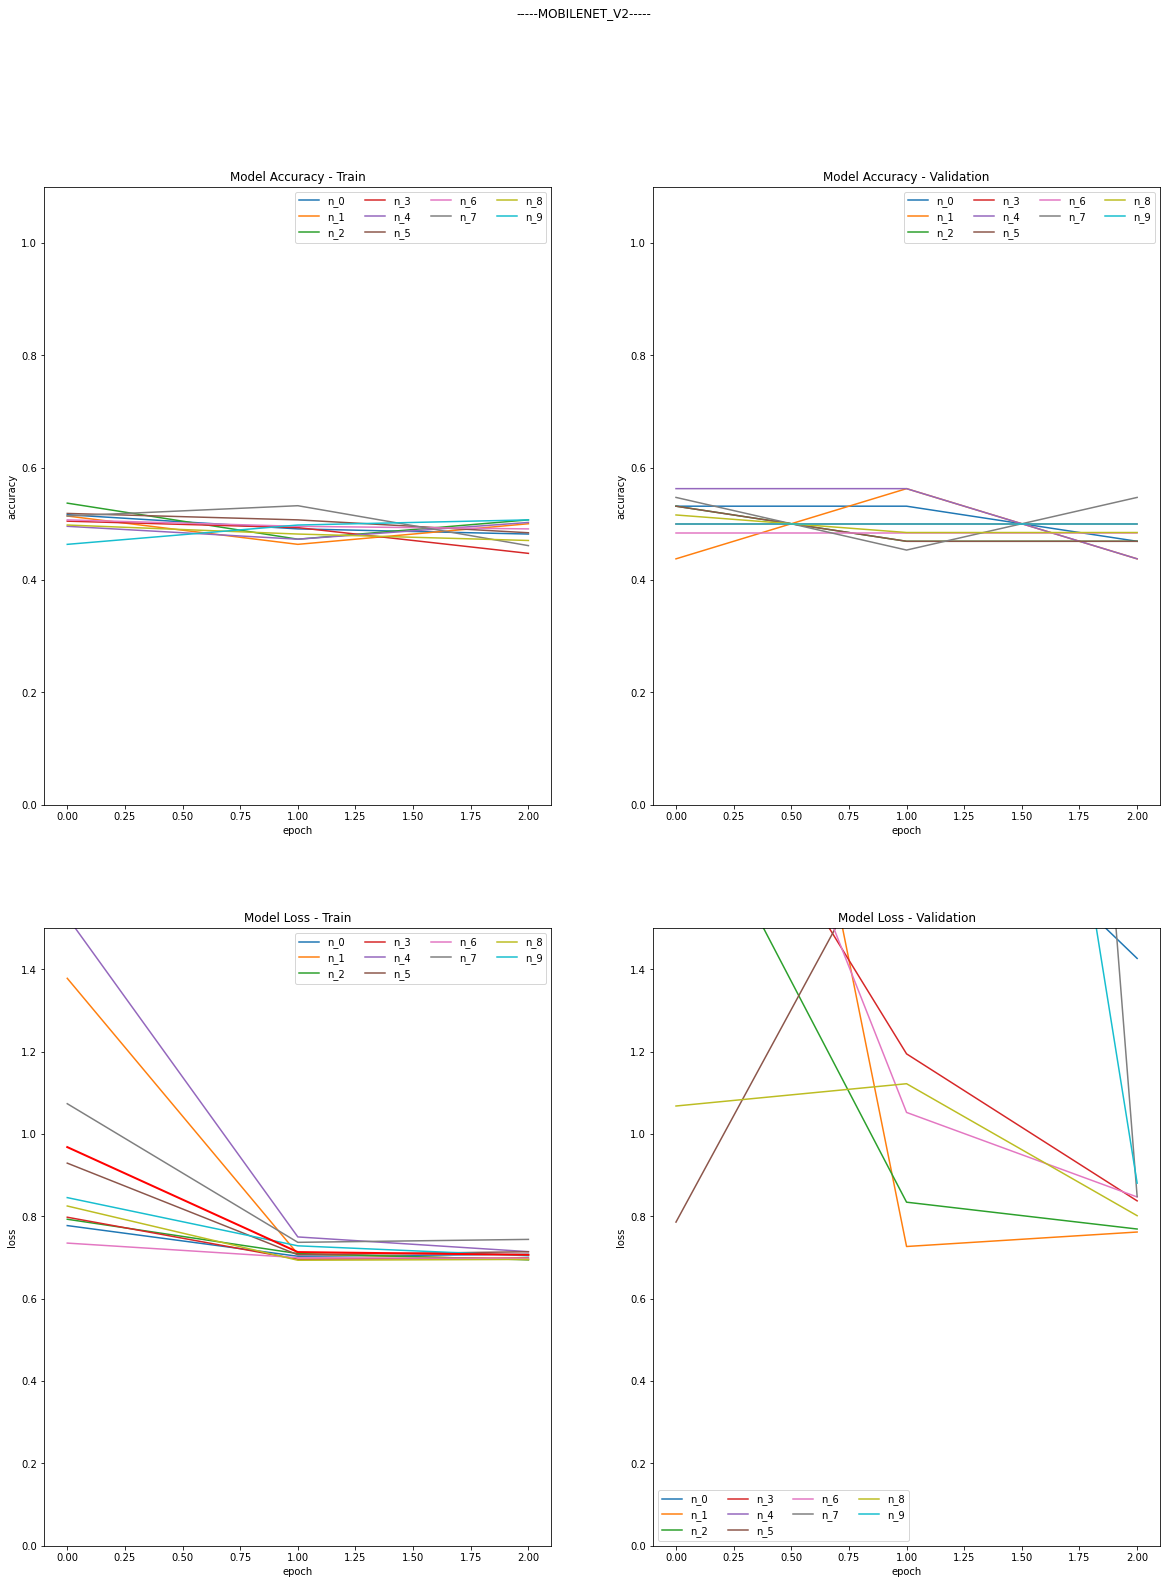

In [23]:
runner.draw_training_history()

# Load Best Model

In [24]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [25]:
runner.save_model()

-------------------- save model -------------------
Saving model


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: trained_model/assets
..Model saved
...Model path: trained_model
Saving model to neptune
 ..Uploading file trained_model.zip
Model saved into Neptune
Saving process finished


# Test Trained Model

## Validation Split

In [26]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model(verbose=False)

Testing Trained Model
Predicting labels....
2/2 [==============================] - 1s 39ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.49090 | EER_interp: 0.00000 | ACC: 0.52000
  Task  1: n_1             | EER_mean: 0.48080 | EER_interp: 0.46470 | ACC: 0.51000
  Task  2: n_2             | EER_mean: 0.49260 | EER_interp: 0.48630 | ACC: 0.48000
  Task  3: n_3             | EER_mean: 0.51170 | EER_interp: 0.52160 | ACC: 0.47000
  Task  4: n_4             | EER_mean: 0.48080 | EER_interp: 0.46470 | ACC: 0.51000
  Task  5: n_5             | EER_mean: 0.50440 | EER_interp: 0.00000 | ACC: 0.55000
  Task  6: n_6             | EER_mean: 0.51450 | EER_interp: 0.00000 | ACC: 0.54000
  Task  7: n_7             | EER_mean: 0.50570 | EER_interp: 0.00000 | ACC: 0.44000
  Task  8: n_8             | EER_mean: 0.48460 | EER_interp: 0.00000 | ACC: 0.45000
  Task  9: n_9             | EER_mean: 0.51000 | EER_interp: 0.51840 | ACC: 0.49000
final_EER_mean: 24.56% | final_EER_median: 

## Test Split

In [27]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model(verbose=False)

Testing Trained Model
Predicting labels....
1/1 [==============================] - 0s 437ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.47310 | EER_interp: 0.00000 | ACC: 0.56000
  Task  1: n_1             | EER_mean: 0.53110 | EER_interp: 0.55600 | ACC: 0.46000
  Task  2: n_2             | EER_mean: 0.50230 | EER_interp: 0.50410 | ACC: 0.56000
  Task  3: n_3             | EER_mean: 0.46890 | EER_interp: 0.44400 | ACC: 0.54000
  Task  4: n_4             | EER_mean: 0.52490 | EER_interp: 0.54520 | ACC: 0.52000
  Task  5: n_5             | EER_mean: 0.46890 | EER_interp: 0.00000 | ACC: 0.52000
  Task  6: n_6             | EER_mean: 0.49110 | EER_interp: 0.00000 | ACC: 0.52000
  Task  7: n_7             | EER_mean: 0.46640 | EER_interp: 0.00000 | ACC: 0.48000
  Task  8: n_8             | EER_mean: 0.50000 | EER_interp: 0.00000 | ACC: 0.60000
  Task  9: n_9             | EER_mean: 0.54550 | EER_interp: 0.00000 | ACC: 0.50000
final_EER_mean: 20.49% | final_EER_median:

# Visualize Model Classification

# Finishing Experiment Manager

In [28]:
runner.finish_experiment()

-------------------- finish experiment -------------------
Finishing Neptune
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 29 operations to synchronize with Neptune. Do not kill this process.
All 29 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/guilhermemg/icao-nets-training-2/e/ICAO-367
